### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection and Processing

In [3]:
# Loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [4]:
# readind the first five rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# getting information about the dataframe
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#Checking the distribution of categorical Data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Label Encoding
Encoding the categorical data

In [9]:
# as machine learning model cannot understand text we are going to convert the text to numerical value
# Encoding "Fuel_Type Column"
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding Seller Column"
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding "Transmission Column"
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the Data and Target


In [11]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [12]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Splitting the Data into Training and Testing

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

### Model Training
1. Linear Regression

In [15]:
lin_reg=LinearRegression()

In [16]:
lin_reg.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [17]:
# Prediction on training data
Train_data_pred=lin_reg.predict(X_train)

### R square error

In [18]:
error_score=metrics.r2_score(y_train,Train_data_pred)
print("R squared error", error_score)

R squared error 0.8799451660493708


### Visualize the Actual price and Predicted Price

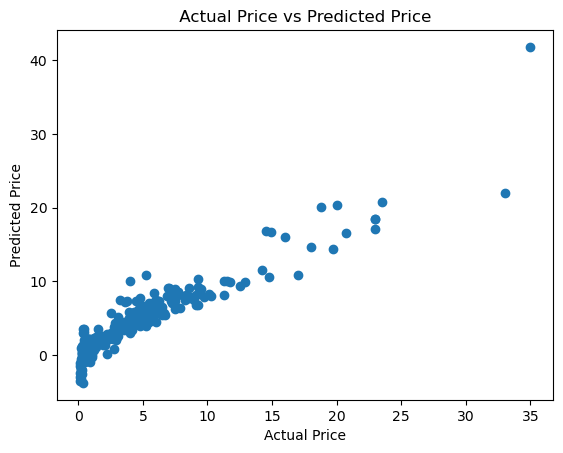

In [19]:
plt.scatter(y_train,Train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Price vs Predicted Price ")
plt.show()

### Predicting Test Data


In [20]:
# Prediction on testing data
Test_data_pred=lin_reg.predict(X_test)

In [21]:
error_score=metrics.r2_score(y_test,Test_data_pred)
print("R squared error", error_score)

R squared error 0.8365766715027054


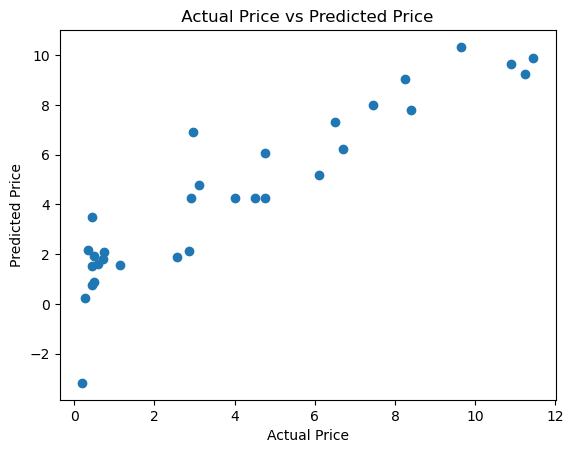

In [22]:
plt.scatter(y_test,Test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Price vs Predicted Price ")
plt.show()

### Lasso Regression

In [23]:
las_reg=Lasso()

In [24]:
las_reg.fit(X_train,y_train)

Lasso()

In [25]:
# Prediction on training data
Train_data_pred=las_reg.predict(X_train)

In [26]:
error_score=metrics.r2_score(y_train,Train_data_pred)
print("R squared error", error_score)

R squared error 0.8427856123435794


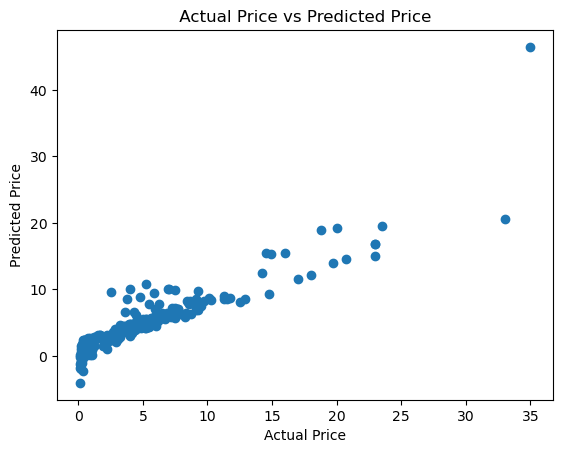

In [27]:
plt.scatter(y_train,Train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Price vs Predicted Price ")
plt.show()

In [28]:
# Prediction on testing data
Test_data_pred=las_reg.predict(X_test)

In [29]:
error_score=metrics.r2_score(y_test,Test_data_pred)
print("R squared error", error_score)

R squared error 0.8709167941173195


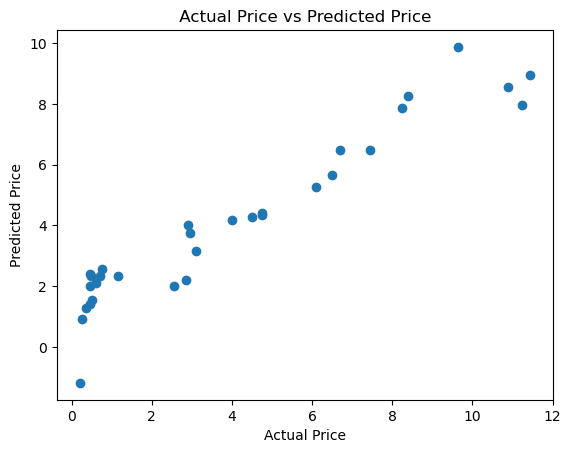

In [30]:
plt.scatter(y_test,Test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Price vs Predicted Price ")
plt.show()